0.5012531328320904 -70.03846153846153


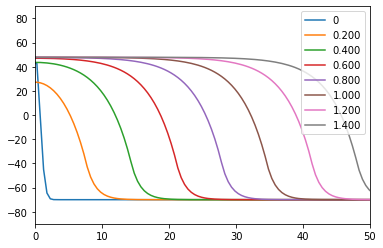

In [1]:
import numpy as np
import matplotlib.pyplot as plt

V_mem = -90
s = 1
bq = 0.5
g_Na = 1/5
g_K = 5
V_Na = 54
V_K = -75
V_star = -40
V_mem = (g_Na*V_Na + g_K*V_K)/(g_K + g_Na)
V_0 = 50  #変更

fig = plt.figure()

nx = 400
lamb = 9.1
tau = 2
d = lamb**2/tau
x = np.linspace(-100,100,nx)
dx = x[2] - x[1]
etime = 1.5
dt = 0.0005

V = np.zeros(nx)
Vn = np.zeros(nx)
for i in range(0,nx):
    V[i] = (V_0-V_mem)*np.exp(-(x[i]/s)**2) + V_mem

plt.plot(x,V, label='0')

def f(V):
    gNa = 100/(1+np.exp(bq*(V_star-V))) + 1/5
    return gNa/g_K * (V - V_Na) + V - V_K

time = 0
while(time<=etime):
    Vn[0] = V[0] - dt/tau*f(V[0]) + d*(V[1]-2*V[0]+V[nx-1]) *nx**2* dt/40000  
    Vn[nx-1] = V[nx-1] - dt/tau*f(V[nx-1]) + d*(V[0]-2*V[nx-1]+V[nx-2]) *nx**2* dt/40000   
    for i in range(1,nx-1):
        Vn[i] = V[i] - dt/tau*f(V[i]) + d*(V[i+1]-2*V[i]+V[i-1]) *nx**2* dt/40000   
    V = Vn
    time = time + dt
    if int(time*2000)%400 == 0:
        plt.plot(x,V,label='{:.3f}'.format(time))

print(dx, V_mem)
plt.xlim(0,50)
plt.ylim(-90,90)
plt.legend()
plt.show()


         0          1          2          3          4          5    \
0 -70.038385 -70.038385 -70.038385 -70.038385 -70.038385 -70.038385   
1 -70.038316 -70.038316 -70.038316 -70.038316 -70.038316 -70.038316   
2 -70.038255 -70.038255 -70.038255 -70.038255 -70.038255 -70.038255   
3 -70.038200 -70.038200 -70.038200 -70.038200 -70.038200 -70.038200   
4 -70.038152 -70.038152 -70.038152 -70.038152 -70.038152 -70.038152   
5 -70.038108 -70.038108 -70.038108 -70.038108 -70.038108 -70.038108   
6 -70.038069 -70.038069 -70.038069 -70.038069 -70.038069 -70.038069   

         6          7          8          9    ...        390        391  \
0 -70.038385 -70.038385 -70.038385 -70.038385  ... -70.038385 -70.038385   
1 -70.038316 -70.038316 -70.038316 -70.038316  ... -70.038316 -70.038316   
2 -70.038255 -70.038255 -70.038255 -70.038255  ... -70.038255 -70.038255   
3 -70.038200 -70.038200 -70.038200 -70.038200  ... -70.038200 -70.038200   
4 -70.038152 -70.038152 -70.038152 -70.038152  ... 

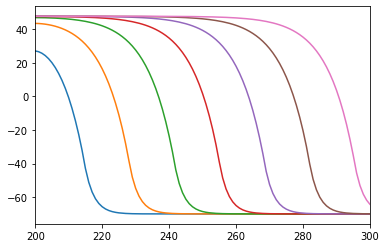

In [35]:
import pandas as pd

V = np.zeros(nx)
Vn = np.zeros(nx)
for i in range(0,nx):
    V[i] = (V_0-V_mem)*np.exp(-(x[i]/s)**2) + V_mem

def f(V):
    gNa = 100/(1+np.exp(bq*(V_star-V))) + 1/5
    return gNa/g_K * (V - V_Na) + V - V_K

time = 0
V_dat = []
while(time<=etime):
    Vn[0] = V[0] - dt/tau*f(V[0]) + d*(V[1]-2*V[0]+V[nx-1]) *nx**2* dt/40000  
    Vn[nx-1] = V[nx-1] - dt/tau*f(V[nx-1]) + d*(V[0]-2*V[nx-1]+V[nx-2]) *nx**2* dt/40000   
    for i in range(1,nx-1):
        Vn[i] = V[i] - dt/tau*f(V[i]) + d*(V[i+1]-2*V[i]+V[i-1]) *nx**2* dt/40000   
    V = Vn
    time = time + dt
    if int(time*2000)%400 == 0:
        for i in range(nx):
            V_dat.append(V[i])

V_data = np.array(V_dat).reshape(7,400)
#print(V_data.shape)
#print(V_data)
plt.plot(V_data.T)
plt.xlim(200, 300)
df = pd.DataFrame(V_data)
print(df)

In [36]:
df = df.rename({0:'zero', 1:'one', 2:'two', 3:'three', 4:'four', 5:'five', 6:'six'})
df

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
zero,-70.038385,-70.038385,-70.038385,-70.038385,-70.038385,-70.038385,-70.038385,-70.038385,-70.038385,-70.038385,...,-70.038385,-70.038385,-70.038385,-70.038385,-70.038385,-70.038385,-70.038385,-70.038385,-70.038385,-70.038385
one,-70.038316,-70.038316,-70.038316,-70.038316,-70.038316,-70.038316,-70.038316,-70.038316,-70.038316,-70.038316,...,-70.038316,-70.038316,-70.038316,-70.038316,-70.038316,-70.038316,-70.038316,-70.038316,-70.038316,-70.038316
two,-70.038255,-70.038255,-70.038255,-70.038255,-70.038255,-70.038255,-70.038255,-70.038255,-70.038255,-70.038255,...,-70.038255,-70.038255,-70.038255,-70.038255,-70.038255,-70.038255,-70.038255,-70.038255,-70.038255,-70.038255
three,-70.038200,-70.038200,-70.038200,-70.038200,-70.038200,-70.038200,-70.038200,-70.038200,-70.038200,-70.038200,...,-70.038200,-70.038200,-70.038200,-70.038200,-70.038200,-70.038200,-70.038200,-70.038200,-70.038200,-70.038200
four,-70.038152,-70.038152,-70.038152,-70.038152,-70.038152,-70.038152,-70.038152,-70.038152,-70.038152,-70.038152,...,-70.038152,-70.038152,-70.038152,-70.038152,-70.038152,-70.038152,-70.038152,-70.038152,-70.038152,-70.038152
five,-70.038108,-70.038108,-70.038108,-70.038108,-70.038108,-70.038108,-70.038108,-70.038108,-70.038108,-70.038108,...,-70.038108,-70.038108,-70.038108,-70.038108,-70.038108,-70.038108,-70.038108,-70.038108,-70.038108,-70.038108
six,-70.038069,-70.038069,-70.038069,-70.038069,-70.038069,-70.038069,-70.038069,-70.038069,-70.038069,-70.038069,...,-70.038069,-70.038069,-70.038069,-70.038069,-70.038069,-70.038069,-70.038069,-70.038069,-70.038069,-70.038069


In [37]:
df = df.T
df

,zero,one,two,three,four,five,six
0,-70.038385,-70.038316,-70.038255,-70.0382,-70.038152,-70.038108,-70.038069
1,-70.038385,-70.038316,-70.038255,-70.0382,-70.038152,-70.038108,-70.038069
2,-70.038385,-70.038316,-70.038255,-70.0382,-70.038152,-70.038108,-70.038069
3,-70.038385,-70.038316,-70.038255,-70.0382,-70.038152,-70.038108,-70.038069
4,-70.038385,-70.038316,-70.038255,-70.0382,-70.038152,-70.038108,-70.038069
...,...,...,...,...,...,...,...
395,-70.038385,-70.038316,-70.038255,-70.0382,-70.038152,-70.038108,-70.038069
396,-70.038385,-70.038316,-70.038255,-70.0382,-70.038152,-70.038108,-70.038069
397,-70.038385,-70.038316,-70.038255,-70.0382,-70.038152,-70.038108,-70.038069
398,-70.038385,-70.038316,-70.038255,-70.0382,-70.038152,-70.038108,-70.038069


In [49]:
print(df.query('-10 < six < 10'))

          zero        one        two      three       four       five  \
110 -70.038385 -70.038316 -70.038255 -70.038158 -70.031994 -69.208496   
111 -70.038385 -70.038316 -70.038255 -70.038138 -70.029174 -68.829028   
112 -70.038385 -70.038316 -70.038255 -70.038108 -70.025063 -68.275992   
289 -70.038385 -70.038316 -70.038254 -70.038077 -70.020870 -67.712779   
290 -70.038385 -70.038316 -70.038255 -70.038115 -70.026150 -68.422905   
291 -70.038385 -70.038316 -70.038255 -70.038141 -70.029817 -68.916167   
292 -70.038385 -70.038316 -70.038255 -70.038160 -70.032364 -69.258794   

          six  
110 -7.804843  
111 -0.977853  
112  5.009134  
289  8.942119  
290  3.695252  
291 -2.259559  
292 -9.023496  


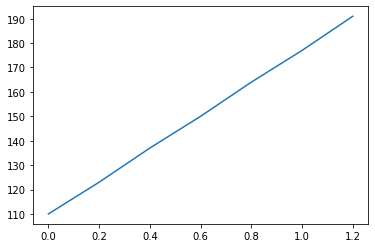

In [53]:
x0 = np.array([210, 223, 237, 250, 264, 277, 291])- 200*np.array([1,1,1,1,1,1,1]) /2
t = np.arange(0,7) * 0.2
plt.plot(t, x0)
plt.show()

In [55]:
from scipy.optimize import curve_fit
def f(t, a, b):
    return a*t + b
popt, pcov = curve_fit(f, t, x0)
popt[0]

67.50000000000038